In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

In [6]:
# Load the Dataset
file_path = 'Covid19data.xlsx'
data = pd.read_excel(file_path)

In [7]:
# Display the first few rows
data.head(40)

,SNo,ObservationDate,Province/State,Region,Country,Last Update,Confirmed,Deaths,Recovered
0,1,03/22/2019,Anhui,Mainland,China,1/22/2020 17:00,1,0,0
1,2,03/24/2019,Beijing,Mainland,China,1/22/2020 17:00,14,0,0
2,3,03/25/2019,Chongqing,Mainland,China,1/22/2020 17:00,6,0,0
3,4,03/26/2019,Fujian,Mainland,China,1/22/2020 17:00,1,0,0
4,5,03/27/2019,Gansu,Mainland,China,1/22/2020 17:00,0,0,0


In [10]:
# Check for null values
print(data.isnull().sum())

SNo                   0
ObservationDate       0
Province/State     2776
Region                1
Country               0
Last Update           0
Confirmed             0
Deaths                0
Recovered             0
dtype: int64


In [12]:
# Inspect column names and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SNo              15039 non-null  int64 
 1   ObservationDate  15039 non-null  object
 2   Province/State   12263 non-null  object
 3   Region           15038 non-null  object
 4   Country          15039 non-null  object
 5   Last Update      15039 non-null  object
 6   Confirmed        15039 non-null  int64 
 7   Deaths           15039 non-null  int64 
 8   Recovered        15039 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.0+ MB
None


In [86]:
#Task 1: Explore and visualize the 3 countries most affected in terms of Confirmed Cases and Deaths.

country__data = data.groupby('Country')[['Confirmed', 'Deaths']].sum().reset_index()


In [88]:
print(country__data)

         Country  Confirmed   Deaths
0    South Korea          1        0
1      Australia         18        0
2     Azerbaijan          1        0
3        Bahamas          3        0
4         Brazil          0        0
5       Cambodia          3        0
6         Canada          7        0
7          China   30788049  1575111
8       Colombia          0        0
9         France         13        0
10        Gambia          1        0
11       Germany          4        0
12        Guiana        117        0
13        Guinea    1150591    18655
14     Hong Kong         23        0
15       Ireland          1        0
16       Islands       2096        0
17         Japan         19        0
18      Kiribati          0        0
19         Korea    8796926   152825
20         Lanka    4244738    19598
21         Macau         23        0
22     Macedonia    9309357   300786
23      Malaysia         12        0
24        Mexico          0        0
25    Mozambique         19        0
2

In [90]:
# Top 3 countries by confirmed cases and deaths
top_countries = country__data.sort_values(by='Confirmed', ascending=False).head(3)
print(top_countries)

      Country  Confirmed   Deaths
7       China   30788049  1575111
22  Macedonia    9309357   300786
19      Korea    8796926   152825


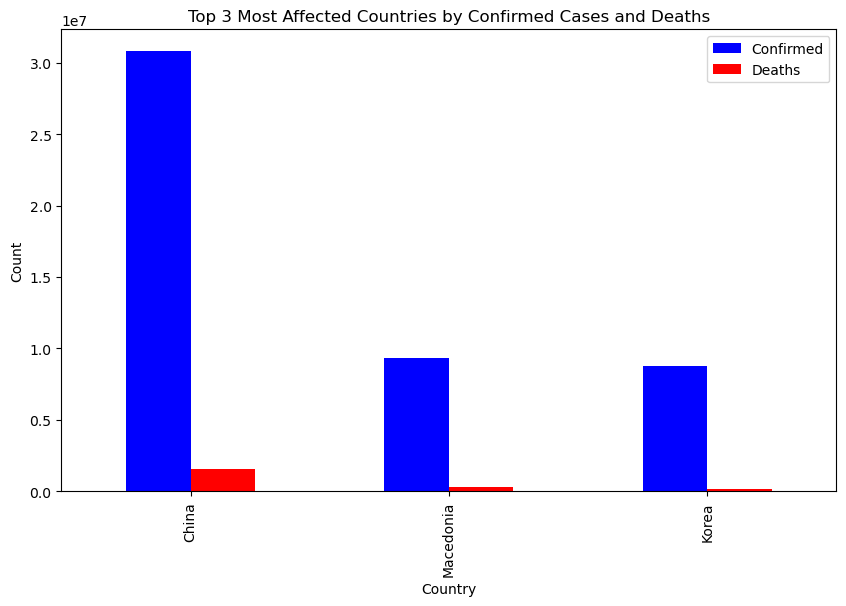

In [42]:
# Visualization
top_countries.plot(x='Country', y=['Confirmed', 'Deaths'], kind='bar', figsize=(10, 6), color=['blue', 'red'])
plt.title('Top 3 Most Affected Countries by Confirmed Cases and Deaths')
plt.ylabel('Count')
plt.xlabel('Country')
plt.show()

In [72]:
# Task 2: Top 10 countries with the most recovered cases
# Group by country and calculate recoveries
top_recovered = data.groupby('Country')['Recovered'].sum().reset_index()

In [74]:
print(top_recovered)

         Country  Recovered
0    South Korea          0
1      Australia          0
2     Azerbaijan          0
3        Bahamas          0
4         Brazil          0
5       Cambodia          0
6         Canada          0
7          China   27418602
8       Colombia          0
9         France          0
10        Gambia          0
11       Germany          0
12        Guiana          6
13        Guinea     923657
14     Hong Kong          0
15       Ireland          0
16       Islands        975
17         Japan          3
18      Kiribati          0
19         Korea    7112698
20         Lanka    3383381
21         Macau          0
22     Macedonia    6800922
23      Malaysia          0
24        Mexico          0
25    Mozambique          0
26       Namibia          0
27         Nepal          0
28     Nicaragua          0
29       Nigeria          0
30        Norway         96
31          Oman          5
32   Palestinian          0
33        Panama         17
34         Papua    

In [76]:
#•	Sort the countries by the highest number of recovered cases.
top_10_recovered = top_recovered.sort_values(by='Recovered', ascending=False).head(10)
print(top_10_recovered)

      Country  Recovered
7       China   27418602
19      Korea    7112698
22  Macedonia    6800922
42   Salvador    5993695
20      Lanka    3383381
13     Guinea     923657
52    Zealand     515615
46      Sudan     416293
16    Islands        975
30     Norway         96


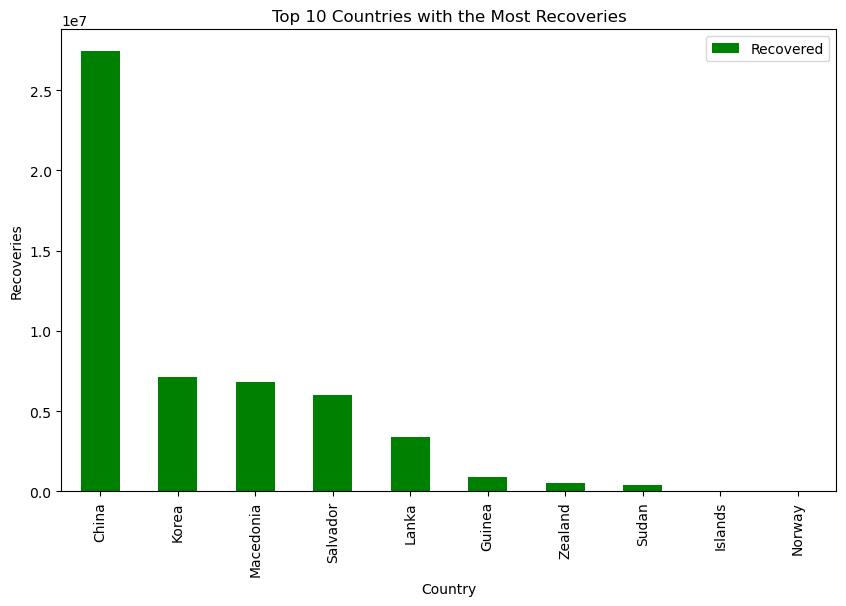

In [66]:
# Visualization
top_10_recovered.plot(x='Country', y='Recovered', kind='bar', figsize=(10, 6), color='green')
plt.title('Top 10 Countries with the Most Recoveries')
plt.ylabel('Recoveries')
plt.xlabel('Country')
plt.show()

In [94]:
# Task 3: Summary of recovery rates for each country
# Calculate Recovery Rate
country_data['Recovery Rate'] = (top_recovered['Recovered'] / country__data['Confirmed']) * 100
print(country_data[['Country', 'Recovery Rate']].sort_values(by='Recovery Rate', ascending=False).head(10))

      Country  Recovery Rate
52    Zealand      92.151449
7       China      89.055991
19      Korea      80.854358
42   Salvador      80.641318
13     Guinea      80.276745
20      Lanka      79.707652
22  Macedonia      73.054691
46      Sudan      58.937299
48   Thailand      54.545455
16    Islands      46.517176


In [98]:
# Task 4: Visualize the top 5 countries with the highest recovery rates
# Filter out countries with 0 confirmed cases
top_recovery_rate = country_data[country__data['Confirmed'] > 0]
top_5_recovery = top_recovery_rate.sort_values(by='Recovery Rate', ascending=False).head(5)

In [100]:
print(top_5_recovery)

     Country  Recovered  Recovery Rate
52   Zealand     515615      92.151449
7      China   27418602      89.055991
19     Korea    7112698      80.854358
42  Salvador    5993695      80.641318
13    Guinea     923657      80.276745


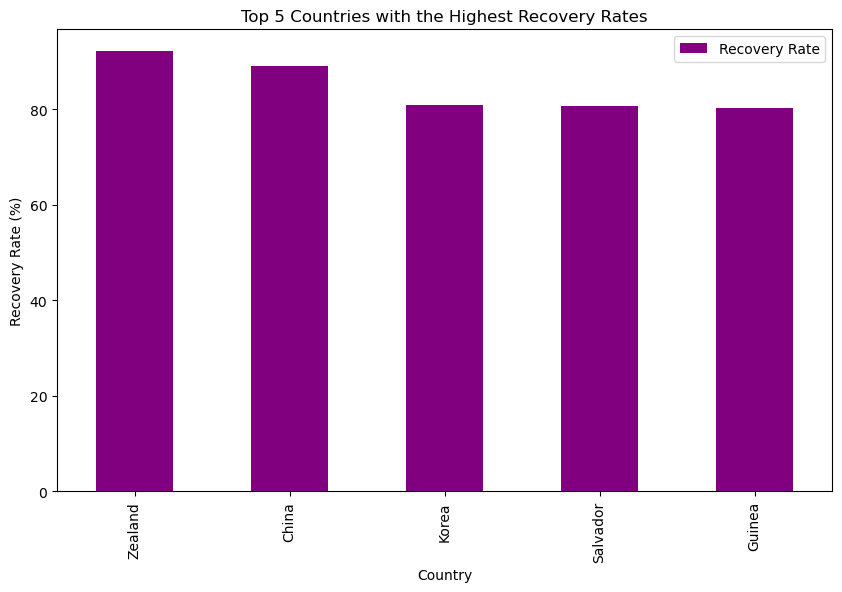

In [102]:
# Visualization
top_5_recovery.plot(x='Country', y='Recovery Rate', kind='bar', figsize=(10, 6), color='purple')
plt.title('Top 5 Countries with the Highest Recovery Rates')
plt.ylabel('Recovery Rate (%)')
plt.xlabel('Country')
plt.show()


In [144]:
# Task 5: Trend over the months (Confirmed Cases, Deaths, Recoveries)
print(data.columns)


Index(['sno', 'observationdate', 'province/state', 'region', 'country',
       'last update', 'confirmed', 'deaths', 'recovered'],
      dtype='object')


In [190]:
data['observationdate'] = pd.to_datetime(data['observationdate'], errors='coerce')
data['month'] = data['observationdate'].dt.month_name()

monthly_data = data.groupby('month')[['confirmed', 'deaths', 'recovered']].sum().reset_index()


In [192]:
print(monthly_data)

        month  confirmed  deaths  recovered
0       April    3949984  163179    3423946
1      August    4908469  194191    4056788
2    December    7821206  247449    6410270
3    February    3449393  116572    2185592
4     January    9319103  282625    8035591
5        July    4724263  191442    3970898
6        June    4269544  176282    3639449
7       March    3909778  142834    3254508
8         May    4160910  176213    3627279
9    November    6199427  213676    5119331
10    October    5424672  204552    4643719
11  September    4861062  190230    4198636


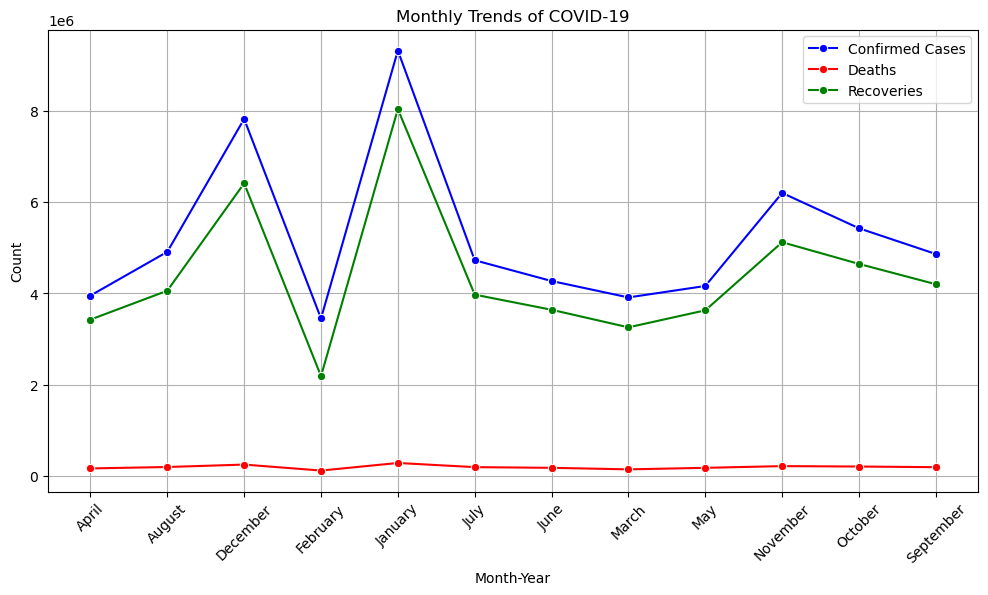

In [194]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_data['month'].astype(str), y=monthly_data['confirmed'], label='Confirmed Cases', color='blue', marker='o')
sns.lineplot(x=monthly_data['month'].astype(str), y=monthly_data['deaths'], label='Deaths', color='red', marker='o')
sns.lineplot(x=monthly_data['month'].astype(str), y=monthly_data['recovered'], label='Recoveries', color='green', marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Trends of COVID-19')
plt.xlabel('Month-Year')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

In [156]:
# Task 6: Year-wise COVID-19 data
# Extract year-wise data
data['year'] = data['observationdate'].dt.year
yearly_data = data.groupby('year')[['confirmed', 'deaths', 'recovered']].sum().reset_index()

In [158]:
print(yearly_data)

   year  confirmed   deaths  recovered
0  2019        649       17         32
1  2020   48789193  1892058   40228739
2  2021   14207969   407170   12337236


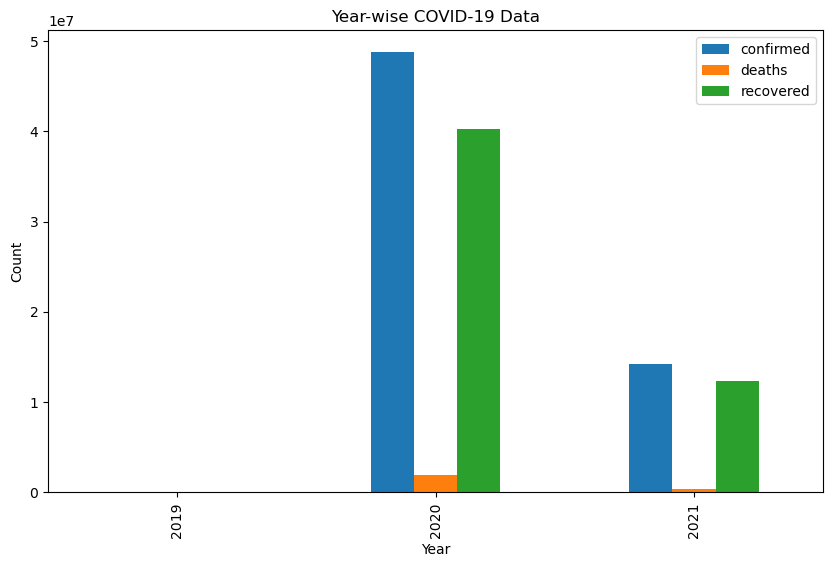

In [160]:
# Visualization
yearly_data.plot(x='year', y=['confirmed', 'deaths', 'recovered'], kind='bar', figsize=(10, 6))
plt.title('Year-wise COVID-19 Data')
plt.ylabel('Count')
plt.xlabel('Year')
plt.show()

In [212]:
# Task 7: Function for country-specific details
def country_summary(country):
    country_info = data[data['country'] == country].groupby('country')[['confirmed', 'deaths', 'recovered']].sum()
    
    if country_info.empty:
        return f"No data available for {country}"
    
    country_info['recovery_rate'] = (country_info['recovered'] / country_info['confirmed']) * 100
    country_info['case_fatality_rate'] = (country_info['deaths'] / country_info['confirmed']) * 100
    
    return f"""
    ------------------------------------
    | COVID-19 Summary for {country}  |
    ------------------------------------
    | Total Confirmed Cases: {int(country_info['confirmed'].values[0])} |
    | Total Deaths: {int(country_info['deaths'].values[0])} |
    | Total Recoveries: {int(country_info['recovered'].values[0])} |
    | Recovery Rate: {country_info['recovery_rate'].values[0]:.2f}% |
    | Case Fatality Rate (CFR): {country_info['case_fatality_rate'].values[0]:.2f}% |
    ------------------------------------
    """



In [216]:
print(country_summary('Zealand'))


    ------------------------------------
    | COVID-19 Summary for Zealand  |
    ------------------------------------
    | Total Confirmed Cases: 559530 |
    | Total Deaths: 6956 |
    | Total Recoveries: 515615 |
    | Recovery Rate: 92.15% |
    | Case Fatality Rate (CFR): 1.24% |
    ------------------------------------
    


In [220]:
# Task 8: Function for monthly details for a given country
def monthly_summary(month_year):
    monthly_info = data[data['month_year'] == month_year].groupby('country')[['confirmed', 'deaths', 'recovered']].sum().reset_index()
    
    if monthly_info.empty:
        return f"No data available for {month_year}"
    
    return tabulate(monthly_info.head(10), headers=['Country', 'Total Confirmed Cases', 'Total Deaths', 'Total Recoveries'], tablefmt='grid')



In [222]:
print(monthly_country_details('Zealand', '2020-05'))

COVID-19 Summary for Zealand in 2020-05:
Total Confirmed Cases: 43359
Total Deaths: 591
Total Recoveries: 40892

